# 1: Importation des packages nécessaires

In [304]:
#importation des librairie

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 2: Chagrement de la base de données.
L'ensemble des données répresentes les ventes mensuales pour une période de 12 mois durant l'année 2019.

Pour modéliser notre jeu de données final, nous procceder à un regroupement de toutes les ventes dans une même dataframe tout gardant la structure des données.

In [215]:
# lectures du nom des fichiers
path=r'datasets_db/'
months=[file for file in os.listdir(path)]
# regroupement des fichiers et création du dataframe
data=pd.DataFrame()
for file in months:
    month=pd.read_csv(path+file)
    data = pd.concat([data,month])
# enregstrement du dataframe finale
data.to_csv(path+"df_sales.csv",index=False)


In [216]:
# Réchargement de la base de données
df_sales=pd.read_csv(path+"df_sales.csv")
# affichage
df_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [217]:
#Information générale sur le jeu de données
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560550 entries, 0 to 560549
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          558915 non-null  object
 1   Product           558915 non-null  object
 2   Quantity Ordered  558915 non-null  object
 3   Price Each        558915 non-null  object
 4   Order Date        558915 non-null  object
 5   Purchase Address  558915 non-null  object
dtypes: object(6)
memory usage: 25.7+ MB


L'ensemble des données de ventes de gadgets à notre disposition est composées plus de  18k d'opérations de ventes au cours des 12 mois, dont 6 colonnes.
De plus nous constatons qu'il y'a un problème de formatage pour certaines variables qui fera l'objet de traitemet comme suit.
- Suprimé toutes les valeurs manquantes,
- Corrigé le probleme de format

In [218]:
# verification des valeurs manquantes
df_sales.isnull().sum()

Order ID            1635
Product             1635
Quantity Ordered    1635
Price Each          1635
Order Date          1635
Purchase Address    1635
dtype: int64

Notre base de données contient 545 valeurs manquantes ou nulles.
Comme nous n'avons pas assez d'informations sur les données , on va proccedé à une pression

In [219]:
#supression des valeurs manquantes
df_sales=df_sales.dropna(how='all')
df_sales.shape

(558915, 6)

Le problème de formatage peut etre causé par la presence d'un mélange de type de données dans une colonne données.

In [220]:
# verification
df_sales.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
477974,221975,AAA Batteries (4-pack),1,2.99,06/01/19 18:10,"985 Spruce St, San Francisco, CA 94016"
231091,308877,27in 4K Gaming Monitor,1,389.99,12/18/19 21:13,"146 7th St, Los Angeles, CA 90001"
67604,141290,Apple Airpods Headphones,1,150,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001"
142044,283507,Lightning Charging Cable,1,14.95,11/06/19 09:42,"143 Washington St, Boston, MA 02215"
287782,218777,AAA Batteries (4-pack),1,2.99,06/15/19 10:39,"107 Lake St, Boston, MA 02215"
305090,174403,iPhone,1,700,03/23/19 09:57,"711 Jefferson St, Boston, MA 02215"
118204,174370,Bose SoundSport Headphones,1,99.99,03/12/19 14:03,"604 Lincoln St, Seattle, WA 98101"
443182,143069,Wired Headphones,1,11.99,01/26/19 21:00,"256 7th St, Los Angeles, CA 90001"
310012,196627,Wired Headphones,1,11.99,05/31/19 11:50,"243 River St, San Francisco, CA 94016"
35460,300483,AA Batteries (4-pack),3,3.84,12/26/19 12:55,"200 7th St, Atlanta, GA 30301"


Nous remaquons que la plus part de variables,contiennent des valeurs qui portent le nom de la colonnes.
Donc nous allons créer une nouvelle dataframe contenant seulement des valeurs au bon types

In [221]:
# selection des valeur au bon format
df=pd.DataFrame()
for col in df_sales.columns.tolist():
    df[col]=df_sales[col][df_sales[col]!=str(col)]
# conversion de valeurs au type aproprié
df["Price Each"]=df["Price Each"].astype('float64')
df["Quantity Ordered"]=df["Quantity Ordered"].astype("int32")
df["Order Date"] = pd.to_datetime(df["Order Date"])

C:\Users\Europe\AppData\Local\Temp\ipykernel_6460\2653772619.py:8: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [222]:
#Résumé statistiques des variables numériques
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity Ordered,557850.0,1.124383,1.0,1.0,1.0,1.0,9.0,0.442792
Price Each,557850.0,184.399735,2.99,11.95,14.95,150.0,1700.0,332.730733
Order Date,557850,2019-07-18 21:54:38.887550208,2019-01-01 03:07:00,2019-04-16 21:05:00,2019-07-17 20:40:30,2019-10-26 08:14:00,2020-01-01 05:13:00,NaN


In [223]:
#Résumé statistiques des variables categorielles
df.describe(exclude="number").T

,count,unique,top,freq,mean,min,25%,50%,75%,max
Order ID,557850,178437,160873,15,NaN,NaN,NaN,NaN,NaN,NaN
Product,557850,19,USB-C Charging Cable,65709,NaN,NaN,NaN,NaN,NaN,NaN
Order Date,557850,NaN,NaN,NaN,2019-07-18 21:54:38.887550208,2019-01-01 03:07:00,2019-04-16 21:05:00,2019-07-17 20:40:30,2019-10-26 08:14:00,2020-01-01 05:13:00
Purchase Address,557850,140787,"193 Forest St, San Francisco, CA 94016",27,NaN,NaN,NaN,NaN,NaN,NaN


## 1: Quel est le mois durant lequel nous avons réalisé le meilleur chiffre d'affaire.
Pour connaitre le mois qui genere le meilleure chiffre d'affaire, nous allons calculé les ventes pour chaque mois.
Formule: CA=Qte*PU

In [224]:
# recuperation du mois
df["Month"]=df["Order Date"].dt.month
# creation de la colonne chiffre
df["Sale"]=df["Price Each"]*df["Quantity Ordered"]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


C:\Users\Europe\AppData\Local\Temp\ipykernel_6460\4142718889.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




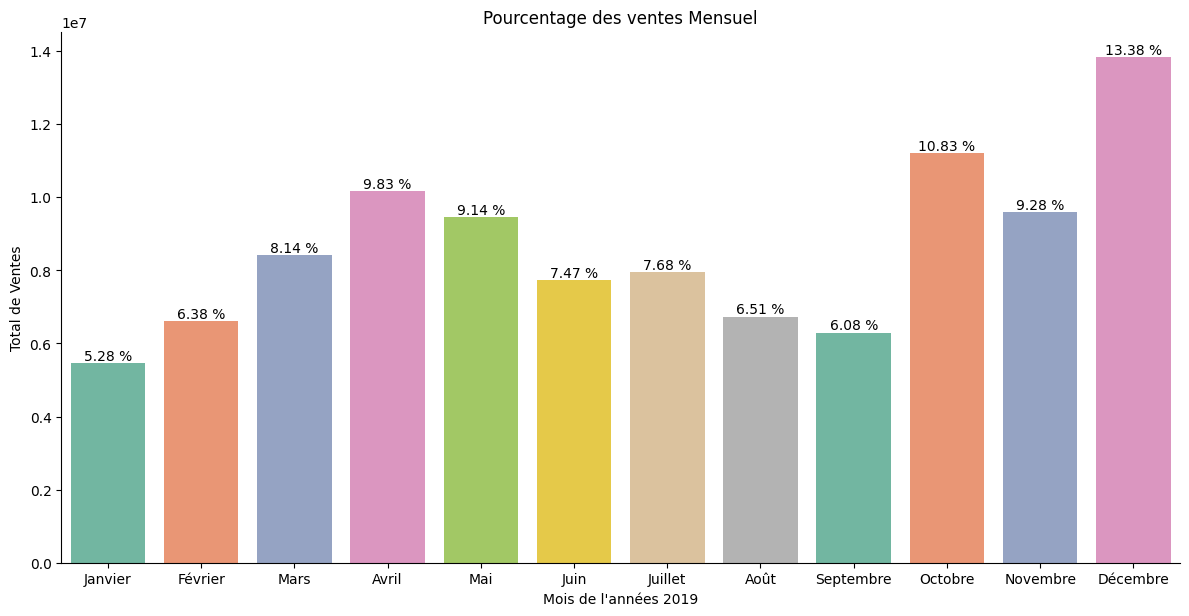

In [225]:
# comptage du nombre de ventes par mois
month_sales=df.groupby("Month")["Sale"].sum()

months_year=["Janvier","Février","Mars","Avril","Mai","Juin","Juillet","Août","Septembre","Octobre","Novembre","Décembre"]
# visualisation
g = sns.catplot(x=months_year, y=month_sales, kind='bar', legend=False, height=6, aspect=2,palette = 'Set2', color= '#abc9ea')
plt.xlabel("Mois de l'années 2019")
plt.ylabel("Total de Ventes")
plt.title("Pourcentage des ventes Mensuel")
# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()/sum(month_sales)*100):.2f} %' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')




Le Mois qui genere plus de vente est le Mois de DECEMBRE avec 13.44% des ventes.



On realise plus de vente durant le mois de Decembre, 
du a plusieurs facteurs comme les cadeau pour la fete de noel, et de fin d'année

# 2: Quelle ville avons nous enregistré un maximum de commande.

Pour trouver la ville qui qui nous offre un maximuim de commande , Nous allons compter le nombre de commande pour chaque ville

In [226]:
#Recuperation de la ville dans la colonne adresse et création d'une colonne city
df["City"]=df["Purchase Address"].apply(lambda c:c.split(",")[1])
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston


### Pour trouver dans quelle ville il y a eu plus commande, Nou allons compte le nombre de commande de chaque ville,pour le faire, nous allons grouper par ville et compter les commande

C:\Users\Europe\AppData\Local\Temp\ipykernel_6460\606659202.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




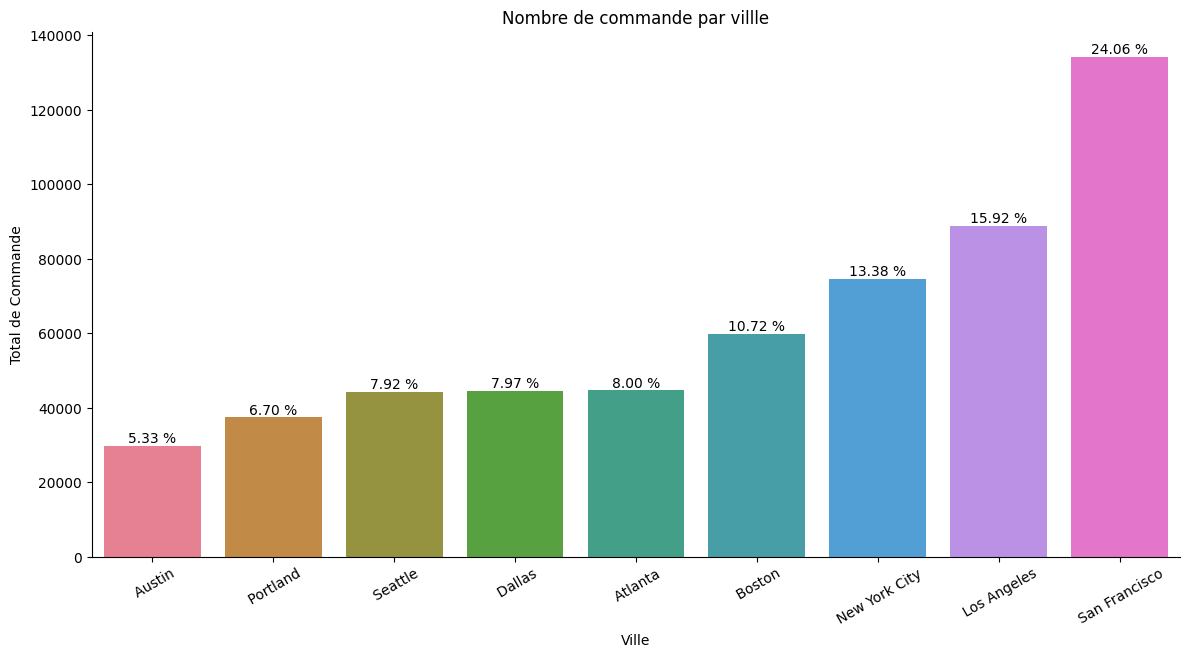

In [227]:
# calcule du nombre de commande par ville
order_city=df.groupby("City")["Order ID"].count().sort_values()

# visualisation
g = sns.catplot(x=order_city.index, y=order_city, kind='bar', height=6, aspect=2,palette = 'husl', color= '#abc9ea')
plt.xlabel("Ville")
plt.ylabel("Total de Commande")
plt.title("Nombre de commande par villle")
# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]
plt.xticks(rotation=30)
# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()/sum(order_city)*100):.2f} %' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

Nous réalisons un maximuim de commande dans la ville de SAN FRANCISCO pour un total de commande de 24% environ

# 3: En quelle moment doit-on faire une campagne publicitaire pour avoir plus de ventes?
Pour trouver le moment approprié d'une compagne publicitaire, nous allons extraire l'heure et compter le nombre de ventes effectués pour chaque heure

In [228]:
# Récuperation de l'heure
df['Time']=df['Order Date'].dt.hour
df['Time']

0          8
2         22
3         14
4         14
5          9
          ..
560545    20
560546    16
560547     7
560548    17
560549     0
Name: Time, Length: 557850, dtype: int32

C:\Users\Europe\AppData\Local\Temp\ipykernel_6460\1833258700.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




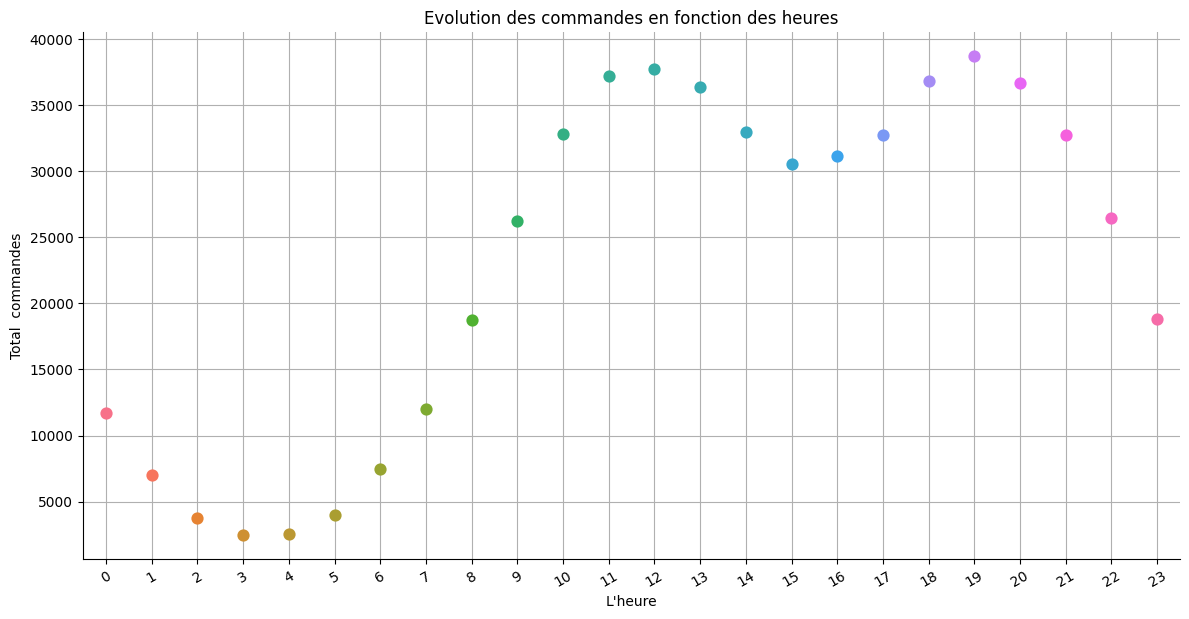

In [229]:

# calcule du nombre de commende pour chaque heur
time_publicity= df.groupby('Time')['Order ID'].count()
# visualisation

g = sns.catplot(x=time_publicity.index,y=time_publicity ,kind='point', height=6, aspect=2,palette = 'husl')
plt.xlabel("L'heure")
plt.ylabel("Total  commandes")
plt.title("Evolution des commandes en fonction des heures")
plt.grid()
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]
plt.xticks(rotation=30)
# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height())} h' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')


### Le moment propisse pour une compagne publicitaire est entre 11h et 13h ou entre 18h 19h 

#### Les compagnes publicitaires sont plus appropriées entre 13h à 22h, creaneau pour le pub

# 4 : Les produits les plus commandés
Nous allons compter le nombre de fois qu'un produit se repete dans dans l'ensemble des commandes

C:\Users\Europe\AppData\Local\Temp\ipykernel_6460\2992020866.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




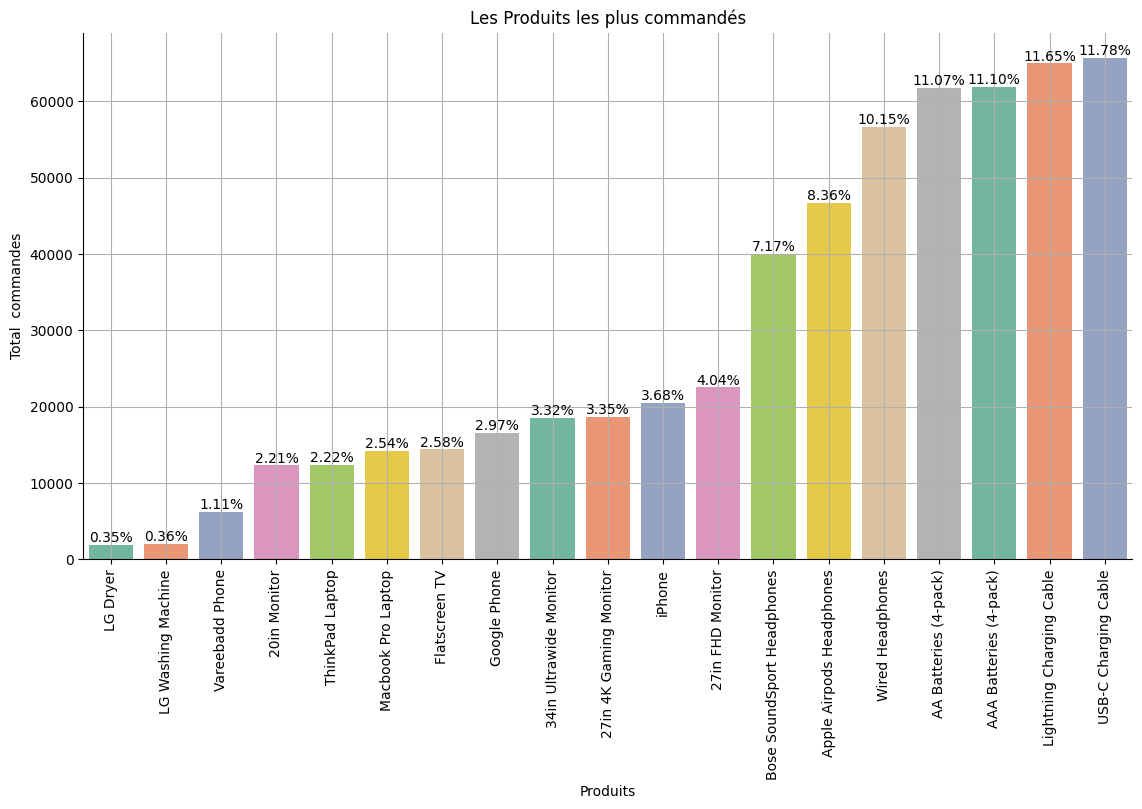

In [230]:


# calculer du nombre de fois que chaque produit figure dans une commande
produits_commended=df.groupby('Product')["Product"].count().sort_values()
# visualisation
g = sns.catplot(x=produits_commended.index,y=produits_commended,kind='bar', height=6, aspect=2,palette = 'Set2')
plt.xlabel("Produits")
plt.ylabel("Total  commandes")
plt.title("Les Produits les plus commandés")
plt.grid()
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]
plt.xticks(rotation=90)
# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()/sum(produits_commended)*100):.2f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')


# 5: Les prouits les plus vendus


C:\Users\Europe\AppData\Local\Temp\ipykernel_6460\576390749.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




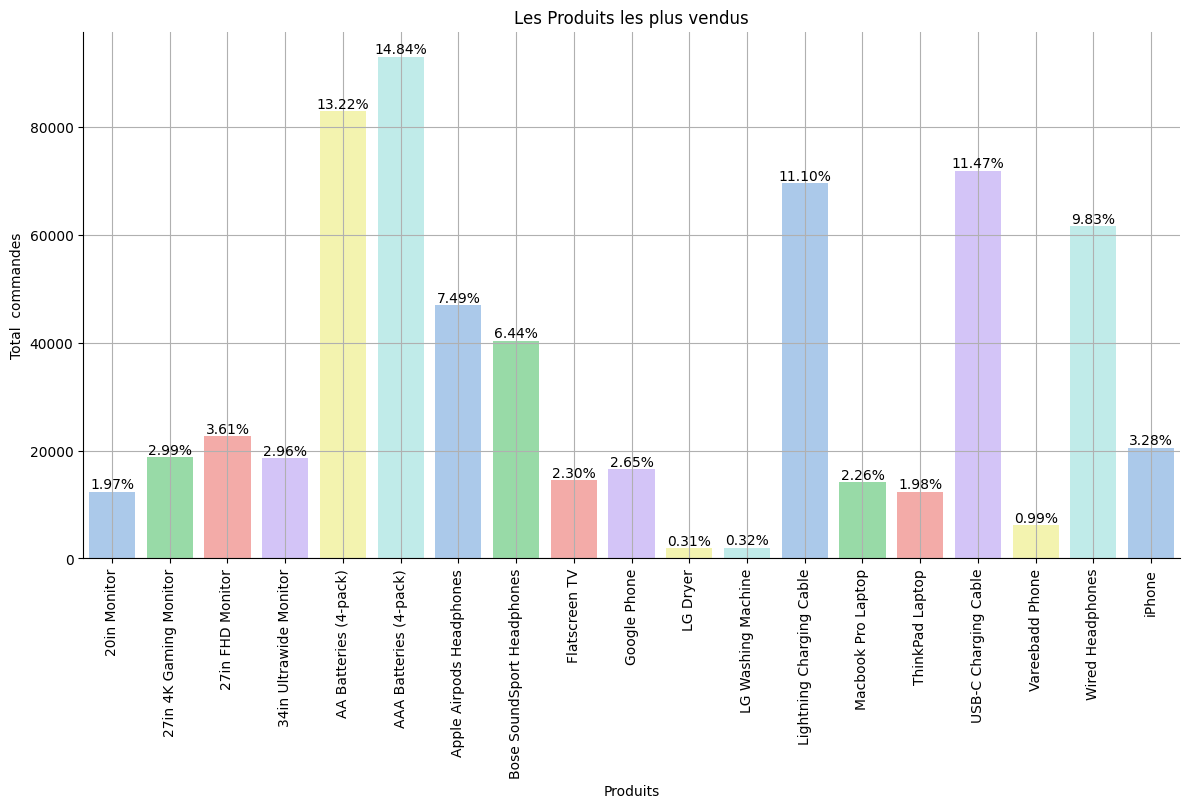

In [231]:

# calculer du nombre de fois que chaque produit figure dans une commandeq

produits_saled=df.groupby('Product')["Quantity Ordered"].sum()
# visualisation
g = sns.catplot(x=produits_saled.index,y=produits_saled,kind='bar', height=6, aspect=2,palette = 'pastel6')
plt.xlabel("Produits")
plt.ylabel("Total  commandes")
plt.title("Les Produits les plus vendus")
plt.grid()
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]
plt.xticks(rotation=90)
# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()/sum(produits_saled)*100):.2f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')


## 6: Examinons pourquoi d'autres produits sont-ils plus vendus que d'autres, pour cela voyons l'impact du prix


C:\Users\Europe\AppData\Local\Temp\ipykernel_6460\3712903477.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Europe\AppData\Local\Temp\ipykernel_6460\3712903477.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



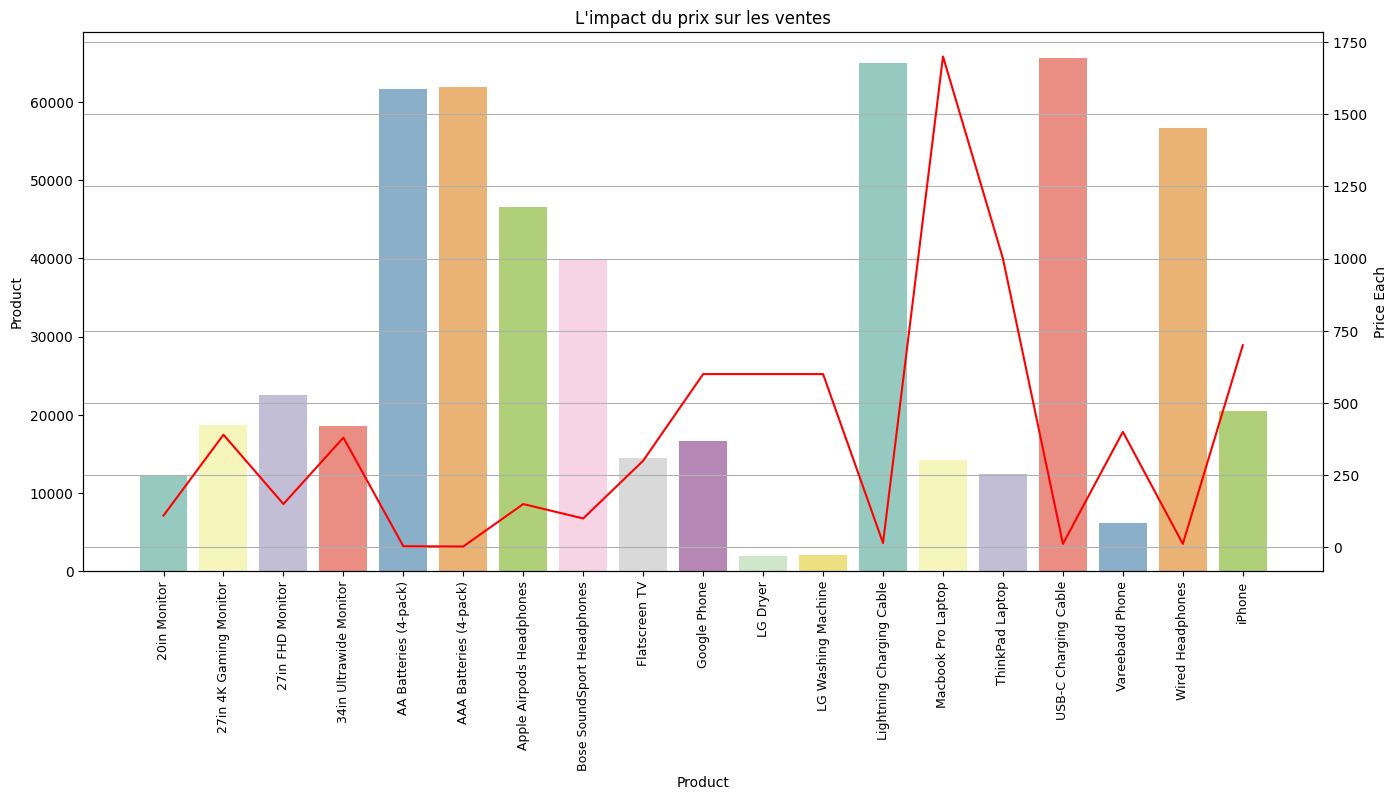

In [232]:

# verification de l'impact du prix sur les ventes
produits_commended=df.groupby('Product')["Product"].count()
produits_price = df.groupby('Product')["Price Each"].mean()
produits_price_commanded=produits_price.index
fig, ax1 = plt.subplots(figsize=(16, 7))
ax2 = ax1.twinx()
sns.barplot(x=produits_price_commanded, y=produits_commended,palette = 'Set3' ,ax=ax1)
sns.lineplot(x=produits_price_commanded, y=produits_price, color="r", ax=ax2)
ax1.set_xticklabels(produits_price_commanded,rotation=90,size=9)

plt.title("L'impact du prix sur les ventes")
plt.grid()
plt.show()

### Nous remarquons que plus le prix est elevé moins le produit est vendu

# 7: Quelles sont les combinaisons des produits qui bse vendent de plus?

Pour le faire, nous savons que toutes les commandes qui on le meme order id appartiennent au meme commande
donc,nous allons recuperer les commandes dupliquer et de grouper les produits concernés

In [248]:
# recuperation des commendes ayant plusieurs produits
df_duplique=df[df["Order ID"].duplicated(keep=False)]

In [250]:
# regrouper les produit de la meme commande
df_duplique["grouped"]=df_duplique.groupby('Order ID')['Product'].transform(lambda c: "/".join(c))


In [254]:
df_duplique.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Time,grouped
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,USB-C Charging Cable/USB-C Charging Cable/USB-...
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,Bose SoundSport Headphones/Bose SoundSport Hea...
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,Google Phone/Wired Headphones/Google Phone/Wir...


In [253]:
# mainteant suprimons les id dupliquer
df1=df_duplique.drop_duplicates(subset=["Order ID"])
df1.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Time,grouped
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,USB-C Charging Cable/USB-C Charging Cable/USB-...
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,Bose SoundSport Headphones/Bose SoundSport Hea...
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,Google Phone/Wired Headphones/Google Phone/Wir...


,groups,proportion
0,LG Dryer/27in 4K Gaming Monitor/LG Dryer/27in ...,1
1,Google Phone/USB-C Charging Cable/Wired Headph...,1
2,LG Dryer/Lightning Charging Cable/LG Dryer/Lig...,1


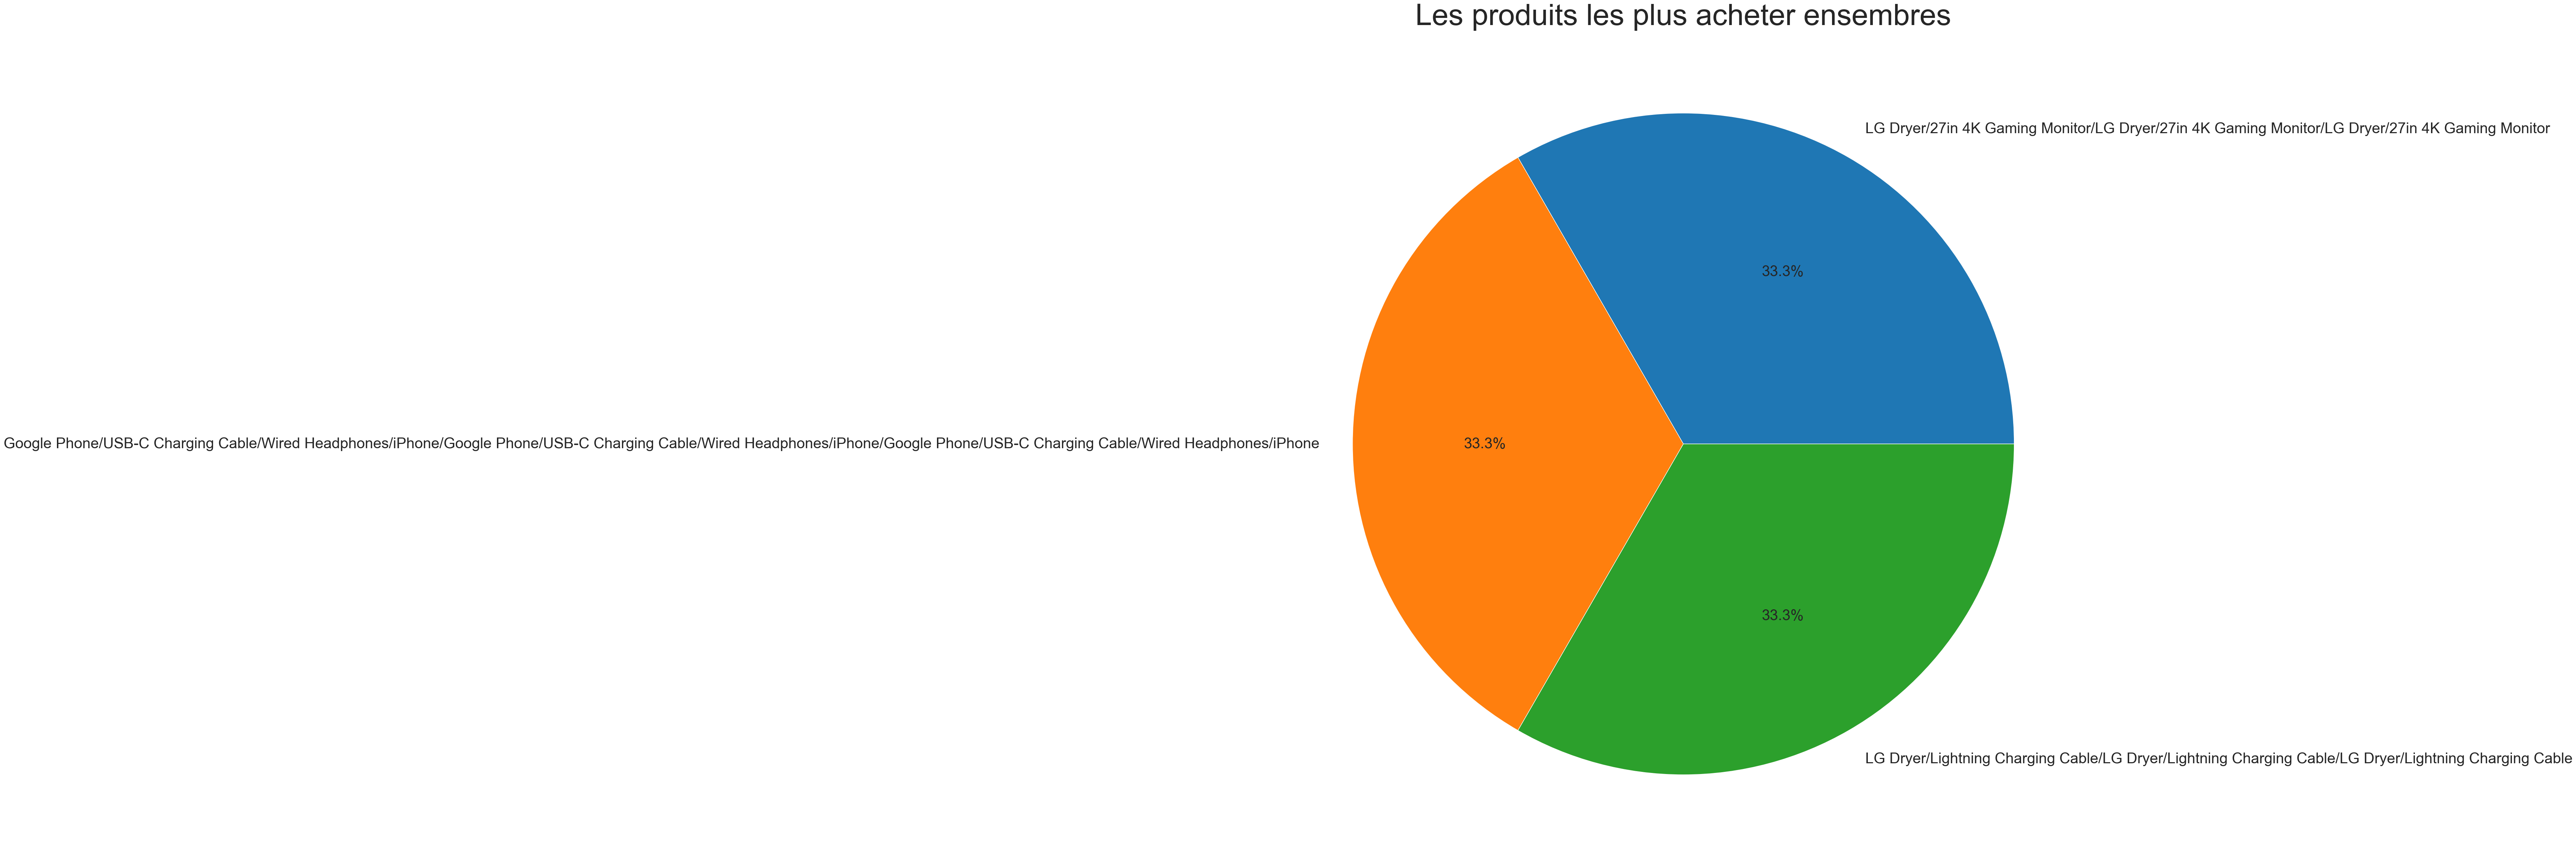

In [330]:
groupe_product=df1["grouped"].value_counts().sort_values()
df_=pd.DataFrame()
df_['groups']=groupe_product.index[3:6]
df_['proportion']=groupe_product.values[3:6]


sns.set_style("darkgrid")
plt.figure(figsize=(30,30))
plt.pie(df_['proportion'], labels=df_['groups'], autopct='%1.1f%%',textprops={'fontsize': 30})
plt.title('Les produits les plus acheter ensembres',fontsize=60)
plt.show()


C:\Users\Europe\AppData\Local\Temp\ipykernel_6460\3133022854.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




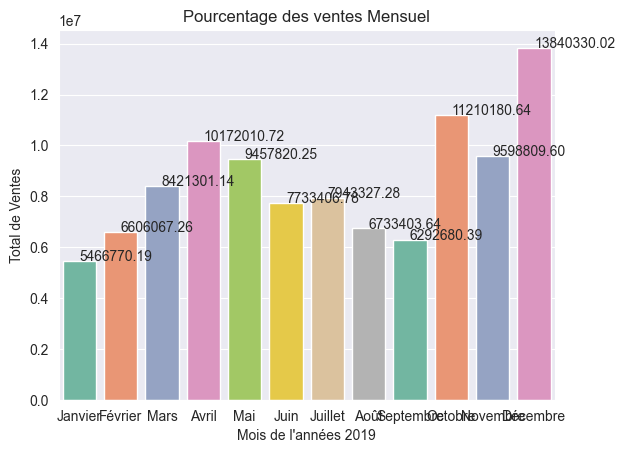

In [349]:
month_sales=df.groupby("Month")["Sale"].sum()

months_year=["Janvier","Février","Mars","Avril","Mai","Juin","Juillet","Août","Septembre","Octobre","Novembre","Décembre"]
# visualisation
g = sns.barplot(x=months_year, y=month_sales, palette = 'Set2', color= '#abc9ea')
plt.xlabel("Mois de l'années 2019")
plt.ylabel("Total de Ventes")
plt.xticks(rotation=30)
plt.title("Pourcentage des ventes Mensuel")

for p in g.patches:
             g.annotate("%.2f" % p.get_height()+3)



e:\exerces G-6\AED\Projets_professionnels\analyse_ventes_gatgets\.venv_sale\Lib\site-packages\seaborn\categorical.py:2761: UserWarning:

catplot is a figure-level function and does not accept target axes. You may wish to try barplot

C:\Users\Europe\AppData\Local\Temp\ipykernel_6460\7701070.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


e:\exerces G-6\AED\Projets_professionnels\analyse_ventes_gatgets\.venv_sale\Lib\site-packages\seaborn\categorical.py:2761: UserWarning:

catplot is a figure-level function and does not accept target axes. You may wish to try barplot

C:\Users\Europe\AppData\Local\Temp\ipykernel_6460\7701070.py:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


e:\exerces G-6\AED\Projets_profe

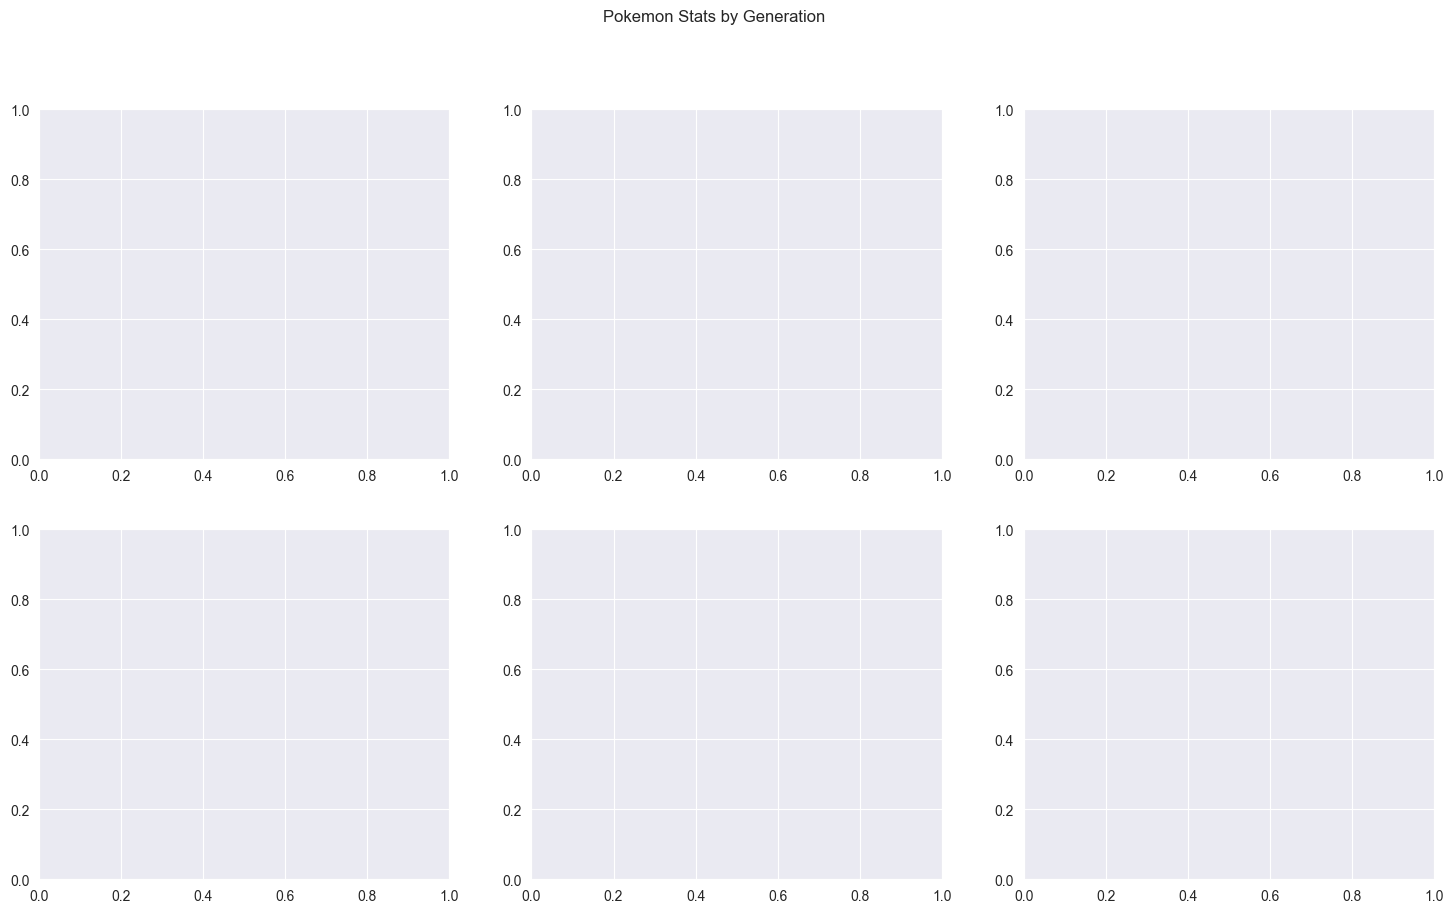

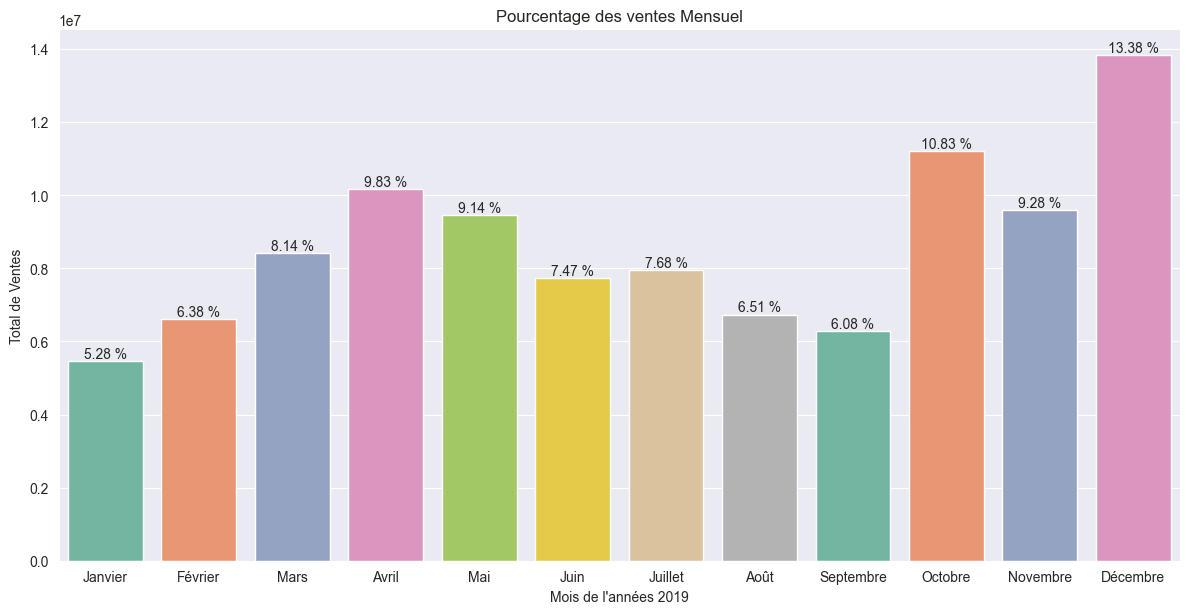

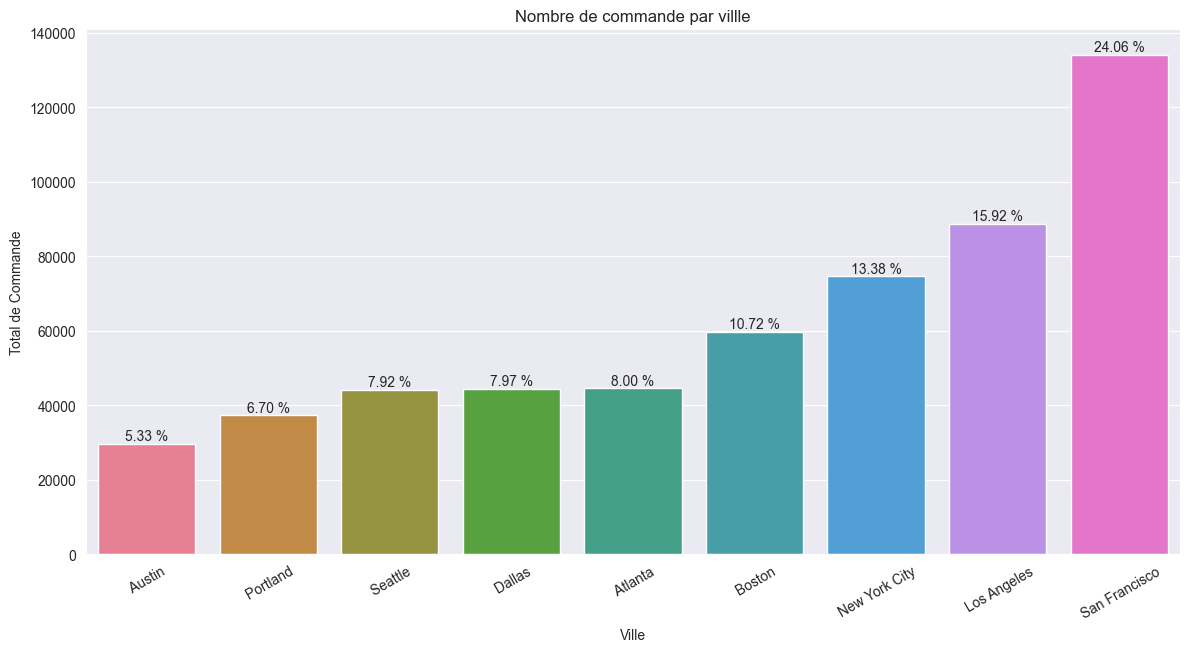

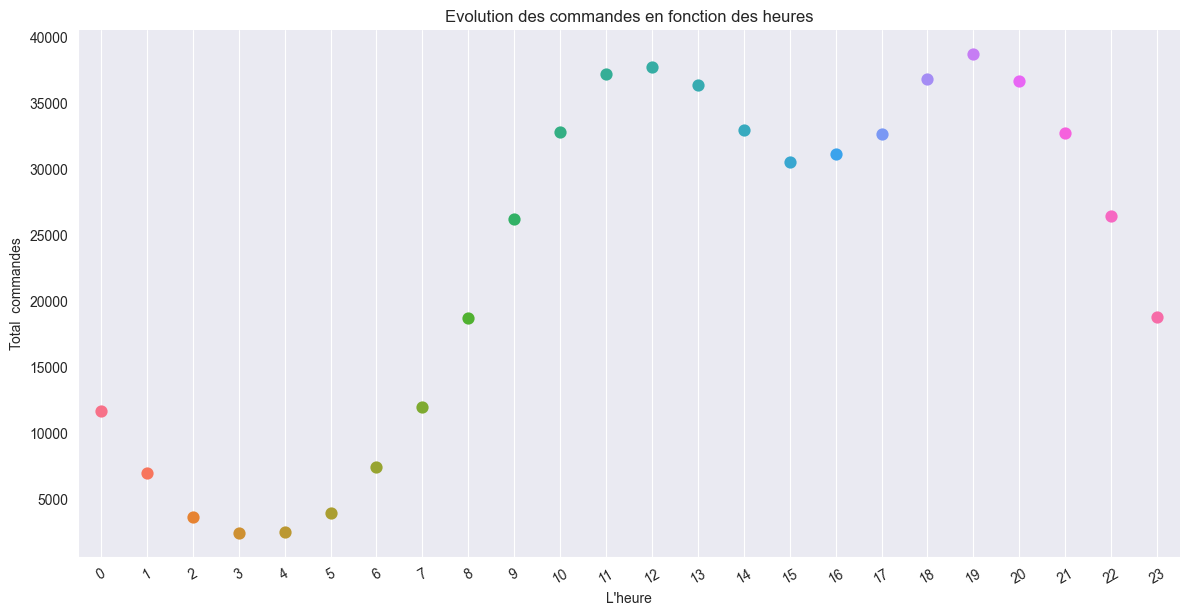

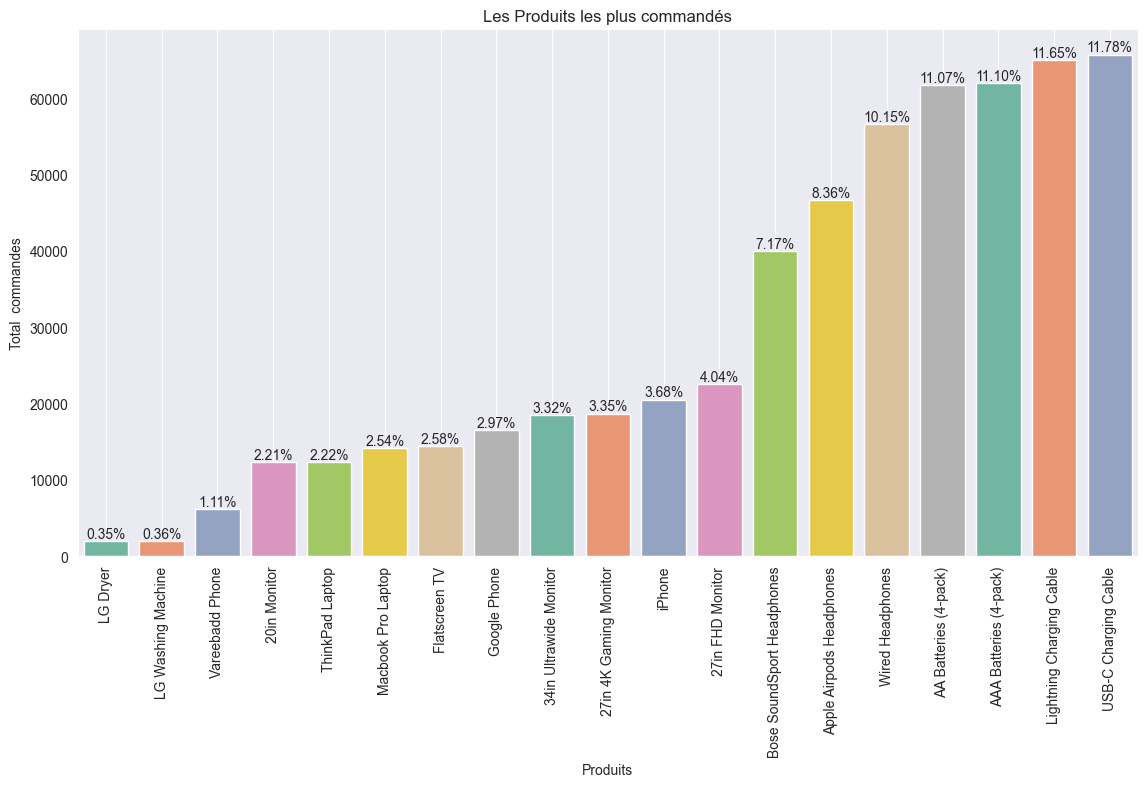

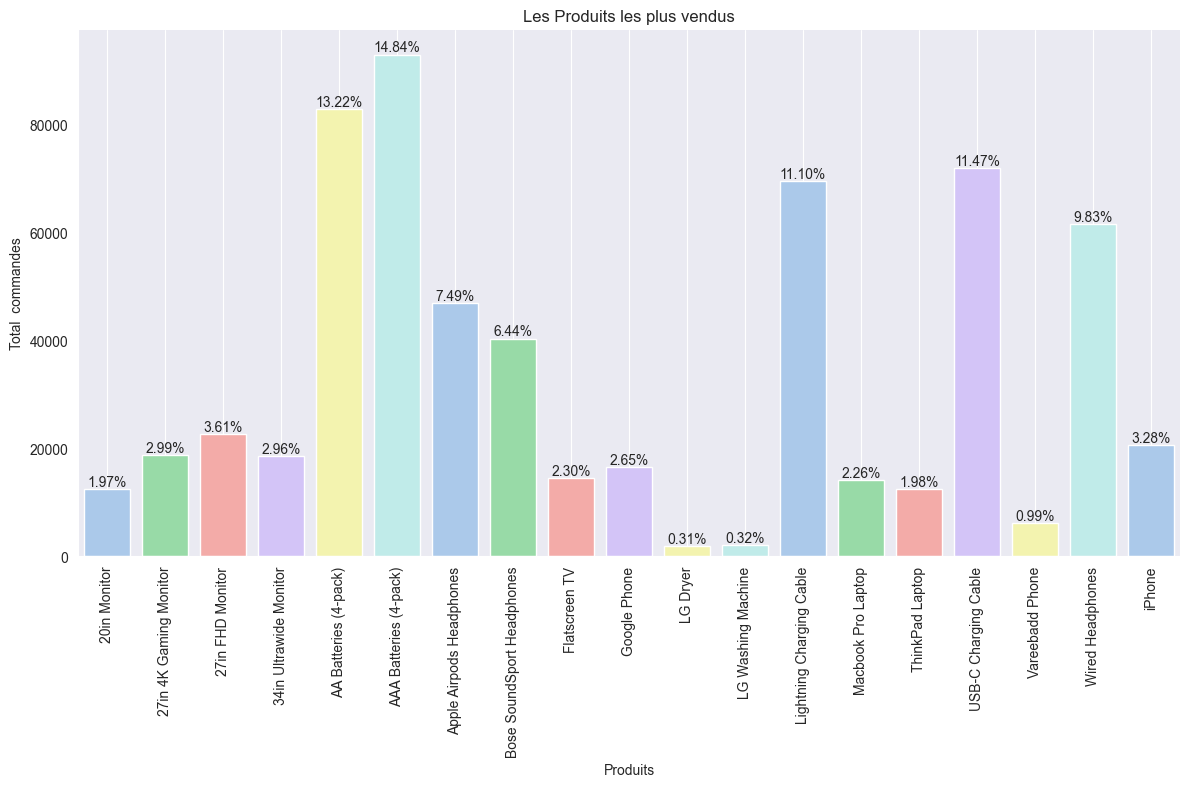

In [334]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Pokemon Stats by Generation')

# sns.boxplot(ax=axes[0, 0], data=pokemon, x='Generation', y='Attack')
# sns.boxplot(ax=axes[0, 1], data=pokemon, x='Generation', y='Defense')
# sns.boxplot(ax=axes[0, 2], data=pokemon, x='Generation', y='Speed')
# sns.boxplot(ax=axes[1, 0], data=pokemon, x='Generation', y='Sp. Atk')
# sns.boxplot(ax=axes[1, 1], data=pokemon, x='Generation', y='Sp. Def')
# sns.boxplot(ax=axes[1, 2], data=pokemon, x='Generation', y='HP')



# comptage du nombre de ventes par mois
month_sales=df.groupby("Month")["Sale"].sum()
plt.xticks(rotation=30)
months_year=["Janvier","Février","Mars","Avril","Mai","Juin","Juillet","Août","Septembre","Octobre","Novembre","Décembre"]
# visualisation
g = sns.barplot(ax=axes[0, 0],x=months_year, y=month_sales, palette = 'Set2', color= '#abc9ea')
plt.xlabel("Mois de l'années 2019")
plt.ylabel("Total de Ventes")
plt.title("Pourcentage des ventes Mensuel")
# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()/sum(month_sales)*100):.2f} %' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')


# calcule du nombre de commande par ville
order_city=df.groupby("City")["Order ID"].count().sort_values()

# visualisation
g = sns.catplot(ax=axes[0, 1],x=order_city.index, y=order_city, kind='bar', height=6, aspect=2,palette = 'husl', color= '#abc9ea')
plt.xlabel("Ville")
plt.ylabel("Total de Commande")
plt.title("Nombre de commande par villle")
# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]
plt.xticks(rotation=30)
# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()/sum(order_city)*100):.2f} %' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

# calcule du nombre de commende pour chaque heur
time_publicity= df.groupby('Time')['Order ID'].count()
# visualisation

g = sns.catplot(ax=axes[0, 2],x=time_publicity.index,y=time_publicity ,kind='point', height=6, aspect=2,palette = 'husl')
plt.xlabel("L'heure")
plt.ylabel("Total  commandes")
plt.title("Evolution des commandes en fonction des heures")
plt.grid()
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]
plt.xticks(rotation=30)
# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height())} h' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')


# calculer du nombre de fois que chaque produit figure dans une commande
produits_commended=df.groupby('Product')["Product"].count().sort_values()
# visualisation
g = sns.catplot(ax=axes[1, 0],x=produits_commended.index,y=produits_commended,kind='bar', height=6, aspect=2,palette = 'Set2')
plt.xlabel("Produits")
plt.ylabel("Total  commandes")
plt.title("Les Produits les plus commandés")
plt.grid()
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]
plt.xticks(rotation=90)
# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()/sum(produits_commended)*100):.2f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')


# calculer du nombre de fois que chaque produit figure dans une commandeq

produits_saled=df.groupby('Product')["Quantity Ordered"].sum()
# visualisation
g = sns.catplot(ax=axes[1, 1],x=produits_saled.index,y=produits_saled,kind='bar', height=6, aspect=2,palette = 'pastel6')
plt.xlabel("Produits")
plt.ylabel("Total  commandes")
plt.title("Les Produits les plus vendus")
plt.grid()
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]
plt.xticks(rotation=90)
# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()/sum(produits_saled)*100):.2f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')


# # verification de l'impact du prix sur les ventes
# produits_commended=df.groupby('Product')["Product"].count()
# produits_price = df.groupby('Product')["Price Each"].mean()
# produits_price_commanded=produits_price.index
# fig, ax1 = plt.subplots(figsize=(16, 7))
# ax2 = ax1.twinx()
# sns.barplot(x=produits_price_commanded, y=produits_commended,palette = 'Set3' ,ax=ax1)
# sns.lineplot(x=produits_price_commanded, y=produits_price, color="r", ax=ax2)
# ax1.set_xticklabels(produits_price_commanded,rotation=90,size=9)

# plt.title("L'impact du prix sur les ventes")
# plt.grid()
# plt.show()